In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import anndata
import glob
import os
import sys
import pandas as pd

import scanpy as sc

import umap
import logging
import tempfile
import scanpy.external as sce
tmp = tempfile.NamedTemporaryFile()

In [2]:
import phenograph as pg

In [391]:
adata = sc.read("/Users/simone/Documents/GitHub/Cytophenograph/output_test/Test.h5ad")

In [393]:
cluster_dict = dict(list(zip(adata.obs["pheno_leiden"].unique(),adata.obs["pheno_leiden"].unique())))

In [394]:
cluster_dict = {k: "{}".format(v) for k, v in cluster_dict.items()}

In [395]:
adata.obs["pheno_leiden"] = adata.obs["pheno_leiden"].map(cluster_dict).astype('category')

In [403]:
adata.obs.dtypes

Sample          category
Cell_type       category
EXP             category
ID              category
Time_point      category
Condition       category
Count           category
batch           category
pheno_leiden    category
dtype: object

In [406]:
?sc.pl.matrixplot

/Users/simone/opt/miniconda3/envs/dev/lib/python3.6/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _ = ax.pcolor(_color_df, **kwds)


{'mainplot_ax': <AxesSubplot:>,
 'group_extra_ax': <AxesSubplot:>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

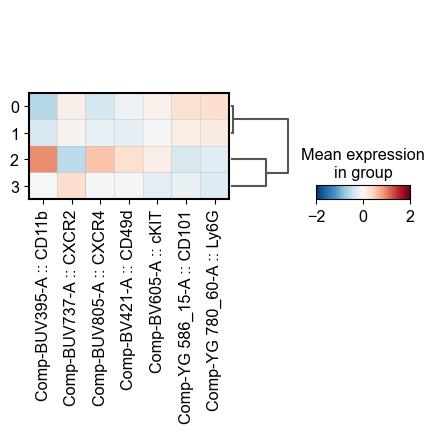

In [405]:
sc.pl.matrixplot(adata, list(adata.var_names), 'batch',
                         dendrogram=True, vmin=-2, vmax=2, cmap='RdBu_r', layer="scaled",
                         show=False, swap_axes=False,return_fig=False)

In [410]:
adata.shape[0]
adata.shape[1]

7

In [415]:
adata.X

array([[-1.168427  , -0.5212593 , -1.3463537 , ...,  0.8762302 ,
        -0.61675805,  0.480816  ],
       [-0.81235355, -1.0785893 ,  0.13037345, ..., -0.05135803,
        -0.4478087 , -0.6850522 ],
       [ 0.7414215 , -1.0785893 , -1.076878  , ...,  0.18475533,
         2.7984326 ,  1.2580615 ],
       ...,
       [-0.2944285 ,  0.7128286 , -0.3546829 , ...,  0.08356389,
         0.9037862 ,  0.62032163],
       [ 0.23428662,  1.5189666 , -2.4458148 , ...,  0.53892535,
        -0.09784219,  1.1883087 ],
       [-1.1252666 ,  0.84220874,  0.15193151, ..., -1.1475986 ,
        -0.93052113, -0.66512287]], dtype=float32)

In [416]:
adata.var

Empty DataFrame
Columns: []
Index: [Comp-BUV395-A :: CD11b, Comp-BUV737-A :: CXCR2, Comp-BUV805-A :: CXCR4, Comp-BV421-A :: CD49d, Comp-BV605-A :: cKIT, Comp-YG 586_15-A :: CD101, Comp-YG 780_60-A :: Ly6G]

In [421]:
adata.obs

Sample  \
export_Specimen_001_NEU_2_WT_neutrophils_5000_1-0       export_Specimen_001_NEU_2_WT_neutrophils_5000   
export_Specimen_001_NEU_2_WT_neutrophils_5000_2-0       export_Specimen_001_NEU_2_WT_neutrophils_5000   
export_Specimen_001_NEU_2_WT_neutrophils_5000_3-0       export_Specimen_001_NEU_2_WT_neutrophils_5000   
export_Specimen_001_NEU_2_WT_neutrophils_5000_4-0       export_Specimen_001_NEU_2_WT_neutrophils_5000   
export_Specimen_001_NEU_2_WT_neutrophils_5000_5-0       export_Specimen_001_NEU_2_WT_neutrophils_5000   
...                                                                                               ...   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  export_Specimen_001_NEU_4_ACKR2KO_LPS_neutroph...   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  export_Specimen_001_NEU_4_ACKR2KO_LPS_neutroph...   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  export_Specimen_001_NEU_4_ACKR2KO_LPS_neutroph...   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  export_Specimen_001_NEU_4_ACKR2KO_LPS_neutroph...   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  export_Specimen_001_NEU_4_ACKR2KO_LPS_neutroph...   

                                                       Cell_type EXP  \
export_Specimen_001_NEU_2_WT_neutrophils_5000_1-0   1NEUTROPHILS  11   
export_Specimen_001_NEU_2_WT_neutrophils_5000_2-0   1NEUTROPHILS  11   
export_Specimen_001_NEU_2_WT_neutrophils_5000_3-0   1NEUTROPHILS  11   
export_Specimen_001_NEU_2_WT_neutrophils_5000_4-0   1NEUTROPHILS  11   
export_Specimen_001_NEU_2_WT_neutrophils_5000_5-0   1NEUTROPHILS  11   
...                                                          ...  ..   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  2NEUTROPHILS  21   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  2NEUTROPHILS  21   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  2NEUTROPHILS  21   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  2NEUTROPHILS  21   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  2NEUTROPHILS  21   

                                                                     ID  \
export_Specimen_001_NEU_2_WT_neutrophils_5000_1-0   1Specimen001NEU1002   
export_Specimen_001_NEU_2_WT_neutrophils_5000_2-0   1Specimen001NEU1002   
export_Specimen_001_NEU_2_WT_neutrophils_5000_3-0   1Specimen001NEU1002   
export_Specimen_001_NEU_2_WT_neutrophils_5000_4-0   1Specimen001NEU1002   
export_Specimen_001_NEU_2_WT_neutrophils_5000_5-0   1Specimen001NEU1002   
...                                                                 ...   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  2Specimen001NEU1004   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  2Specimen001NEU1004   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  2Specimen001NEU1004   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  2Specimen001NEU1004   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...  2Specimen001NEU1004   

                                                   Time_point Condition  \
export_Specimen_001_NEU_2_WT_neutrophils_5000_1-0          10  1RESTING   
export_Specimen_001_NEU_2_WT_neutrophils_5000_2-0          10  1RESTING   
export_Specimen_001_NEU_2_WT_neutrophils_5000_3-0          10  1RESTING   
export_Specimen_001_NEU_2_WT_neutrophils_5000_4-0          10  1RESTING   
export_Specimen_001_NEU_2_WT_neutrophils_5000_5-0          10  1RESTING   
...                                                       ...       ...   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...         20      2LPS   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...         20      2LPS   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...         20      2LPS   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...         20      2LPS   
export_Specimen_001_NEU_4_ACKR2KO_LPS_neutrophi...         20      2LPS   

                                                    Count batch pheno_leiden  
export_Specimen_001_NEU_2_WT_neutrophils_5000_1-0   15000     0            5  
export_Sp

In [ ]:
tmp = list(adata.obs['Flowsom_cluster'].unique())
for _ in tmp:
    sc.pl.umap(adata, color='Flowsom_cluster', add_outline=True,show=False,
           legend_fontoutline=1,frameon=False,na_in_legend=False,
               title='  ', palette='Paired',s=2,groups=[_],save=".".join([_,"pdf"]))

In [195]:
import numpy as np
from matplotlib import colors
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

tmp = list(adata.var_names.unique())
for _ in tmp:
    sc.pl.umap(adata, color=_, show=False,
           legend_fontoutline=1,na_in_legend=False,s=30,
               title=_, palette='Viridis',groups=[_])

In [276]:
cluster = dict(list(zip(adata.obs['Parc_cluster'].unique(),adata.obs['Parc_cluster'].unique()
        )))
cluster = {k: "{}".format(v) for k,v in cluster.items()}
adata.obs['Parc_cluster'] = adata.obs['Parc_cluster'].map(mod).astype('category')
marker = dict(list(zip(adata.var_names,adata.var_names
        )))
sc.pl.matrixplot(adata, marker,'Parc_cluster',cluster,
                 dendrogram=True,vmin=-2, vmax=2, cmap='RdBu_r',layer="scaled")

/Users/simone/opt/miniconda3/envs/dev/lib/python3.6/site-packages/scanpy/plotting/_utils.py:629: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  subplotpars=sppars(left=0, right=1, bottom=bottom_offset),


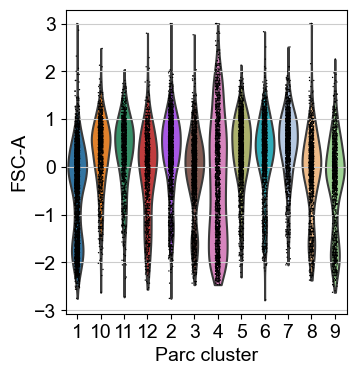

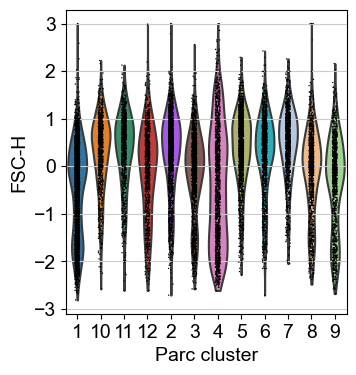

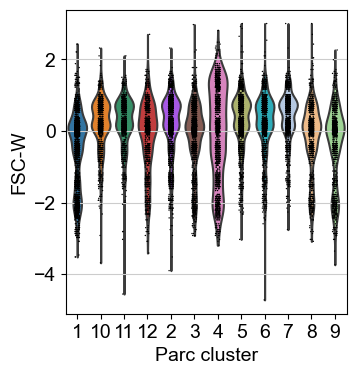

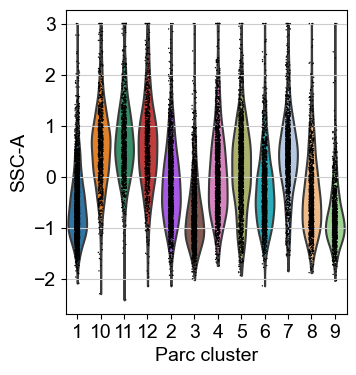

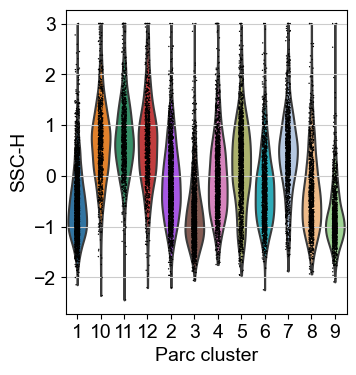

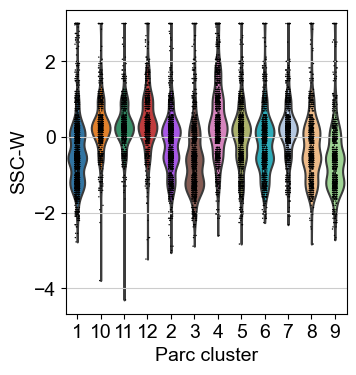

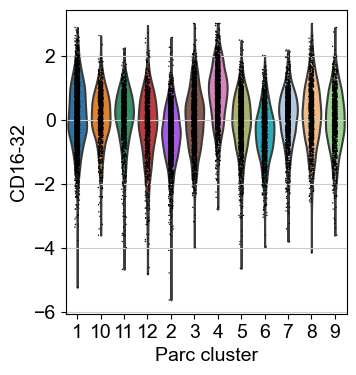

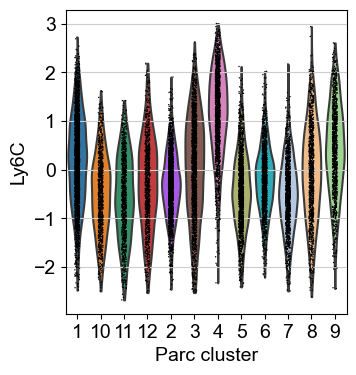

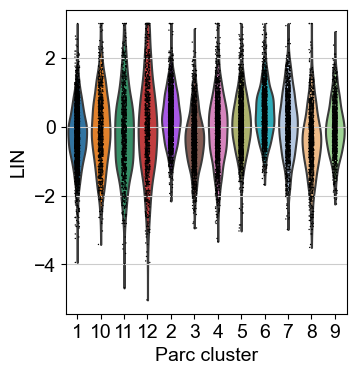

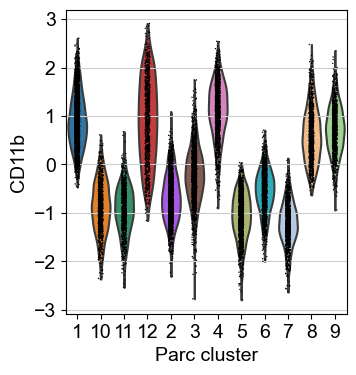

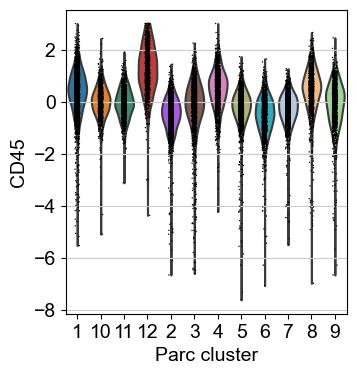

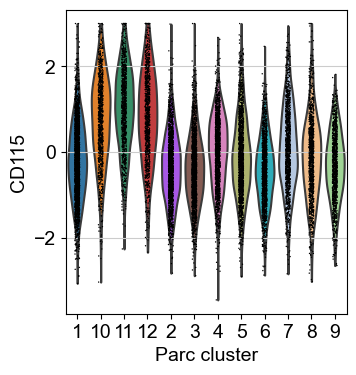

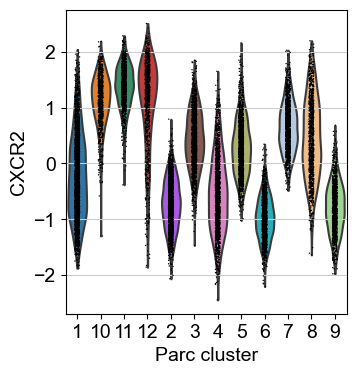

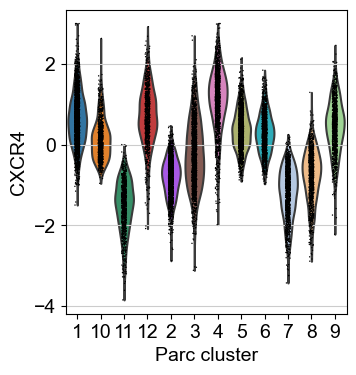

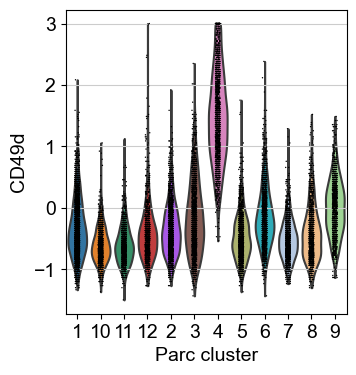

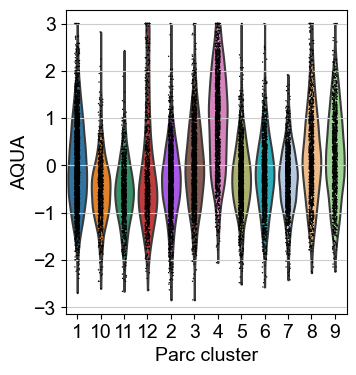

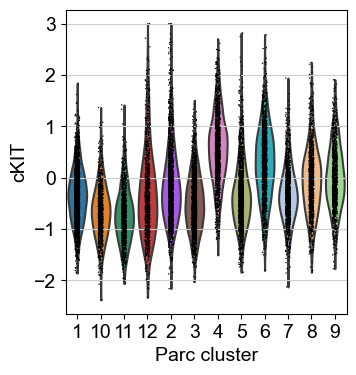

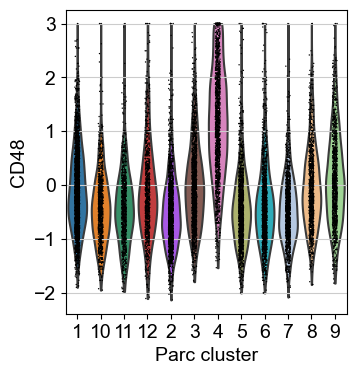

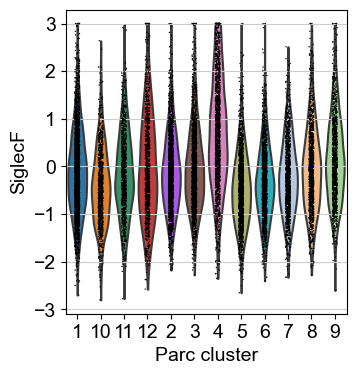

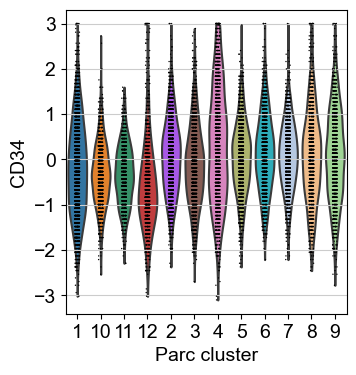

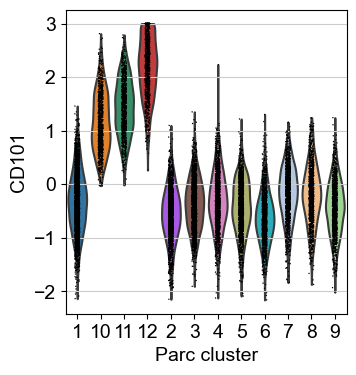

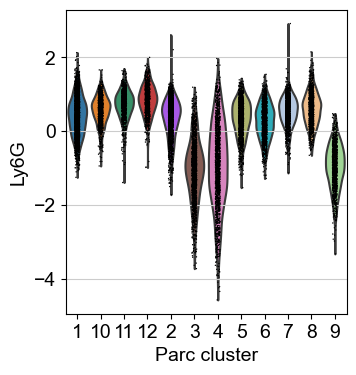

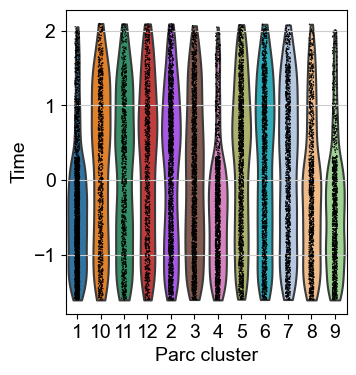

In [337]:
for _ in list(adata.var_names):
    sc.pl.violin(adata,_, groupby='Parc_cluster',layer='raw_data' )

In [336]:
adata

AnnData object with n_obs × n_vars = 20000 × 23
    obs: 'Sample', 'Cell_type', 'EXP', 'ID', 'Time_point', 'Condition', 'Count', 'batch', 'Parc_cluster'
    var: 'original_names', 'mean', 'std'
    uns: 'dendrogram_Parc_cluster', 'Parc_cluster_colors'
    obsm: 'X_umap'
    layers: 'raw_data', 'scaled'

In [313]:
marker

{'FSC-A': 'FSC-A',
 'FSC-H': 'FSC-H',
 'FSC-W': 'FSC-W',
 'SSC-A': 'SSC-A',
 'SSC-H': 'SSC-H',
 'SSC-W': 'SSC-W',
 'CD16-32': 'CD16-32',
 'Ly6C': 'Ly6C',
 'LIN': 'LIN',
 'CD11b': 'CD11b',
 'CD45': 'CD45',
 'CD115': 'CD115',
 'CXCR2': 'CXCR2',
 'CXCR4': 'CXCR4',
 'CD49d': 'CD49d',
 'AQUA': 'AQUA',
 'cKIT': 'cKIT',
 'CD48': 'CD48',
 'SiglecF': 'SiglecF',
 'CD34': 'CD34',
 'CD101': 'CD101',
 'Ly6G': 'Ly6G',
 'Time': 'Time'}

In [308]:
dict.fromkeys(list(adata.var_names),list(adata.var_names))

{'FSC-A': ['FSC-A',
  'FSC-H',
  'FSC-W',
  'SSC-A',
  'SSC-H',
  'SSC-W',
  'CD16-32',
  'Ly6C',
  'LIN',
  'CD11b',
  'CD45',
  'CD115',
  'CXCR2',
  'CXCR4',
  'CD49d',
  'AQUA',
  'cKIT',
  'CD48',
  'SiglecF',
  'CD34',
  'CD101',
  'Ly6G',
  'Time'],
 'FSC-H': ['FSC-A',
  'FSC-H',
  'FSC-W',
  'SSC-A',
  'SSC-H',
  'SSC-W',
  'CD16-32',
  'Ly6C',
  'LIN',
  'CD11b',
  'CD45',
  'CD115',
  'CXCR2',
  'CXCR4',
  'CD49d',
  'AQUA',
  'cKIT',
  'CD48',
  'SiglecF',
  'CD34',
  'CD101',
  'Ly6G',
  'Time'],
 'FSC-W': ['FSC-A',
  'FSC-H',
  'FSC-W',
  'SSC-A',
  'SSC-H',
  'SSC-W',
  'CD16-32',
  'Ly6C',
  'LIN',
  'CD11b',
  'CD45',
  'CD115',
  'CXCR2',
  'CXCR4',
  'CD49d',
  'AQUA',
  'cKIT',
  'CD48',
  'SiglecF',
  'CD34',
  'CD101',
  'Ly6G',
  'Time'],
 'SSC-A': ['FSC-A',
  'FSC-H',
  'FSC-W',
  'SSC-A',
  'SSC-H',
  'SSC-W',
  'CD16-32',
  'Ly6C',
  'LIN',
  'CD11b',
  'CD45',
  'CD115',
  'CXCR2',
  'CXCR4',
  'CD49d',
  'AQUA',
  'cKIT',
  'CD48',
  'SiglecF',
  'CD34',
  'C

In [285]:
adata.layers['scaled'] = adata.X

In [341]:
sc.pp.scale(adata, max_value=6,copy=True).X

array([[ 0.44053015,  0.5034766 ,  0.7898572 , ..., -0.6175602 ,
         0.480816  , -1.6056035 ],
       [ 0.66461384,  0.73610467,  0.68070203, ..., -0.4481569 ,
        -0.6850522 , -1.6056035 ],
       [-0.9679961 , -0.75936157, -1.3386688 , ...,  2.8068073 ,
         1.2580615 , -1.6056035 ],
       ...,
       [ 0.47254214,  0.66963947, -0.02880668, ...,  0.90706986,
         0.62032163,  1.998851  ],
       [-0.19970904, -0.29410535,  0.29865888, ..., -0.09725002,
         1.1883087 ,  1.998851  ],
       [ 0.34449425,  0.53670913, -0.13796186, ..., -0.9321664 ,
        -0.66512287,  1.998851  ]], dtype=float32)

In [342]:
?sc.pl.matrixplot

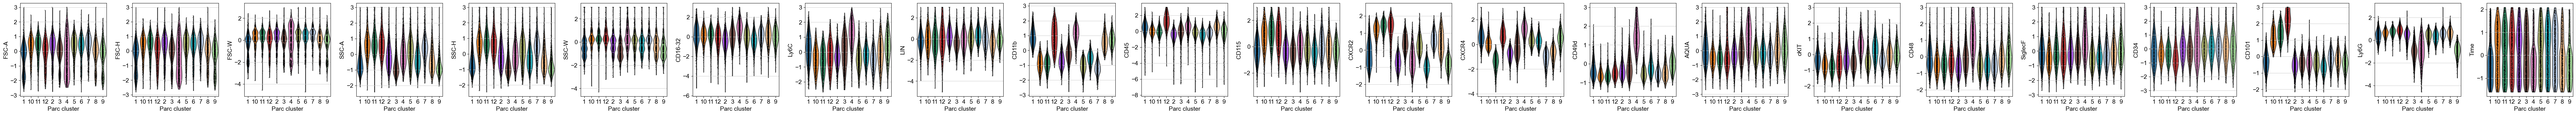

In [331]:
sc.pl.violin(adata, list(adata.var_names), groupby='Parc_cluster' )

In [318]:
marker

{'FSC-A': 'FSC-A',
 'FSC-H': 'FSC-H',
 'FSC-W': 'FSC-W',
 'SSC-A': 'SSC-A',
 'SSC-H': 'SSC-H',
 'SSC-W': 'SSC-W',
 'CD16-32': 'CD16-32',
 'Ly6C': 'Ly6C',
 'LIN': 'LIN',
 'CD11b': 'CD11b',
 'CD45': 'CD45',
 'CD115': 'CD115',
 'CXCR2': 'CXCR2',
 'CXCR4': 'CXCR4',
 'CD49d': 'CD49d',
 'AQUA': 'AQUA',
 'cKIT': 'cKIT',
 'CD48': 'CD48',
 'SiglecF': 'SiglecF',
 'CD34': 'CD34',
 'CD101': 'CD101',
 'Ly6G': 'Ly6G',
 'Time': 'Time'}

categories: 1, 10, 11, etc.
var_group_labels: FSC-A, FSC-H, FSC-W, etc.
/Users/simone/opt/miniconda3/envs/dev/lib/python3.6/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _ = ax.pcolor(_color_df, **kwds)


{'mainplot_ax': <AxesSubplot:>,
 'group_extra_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

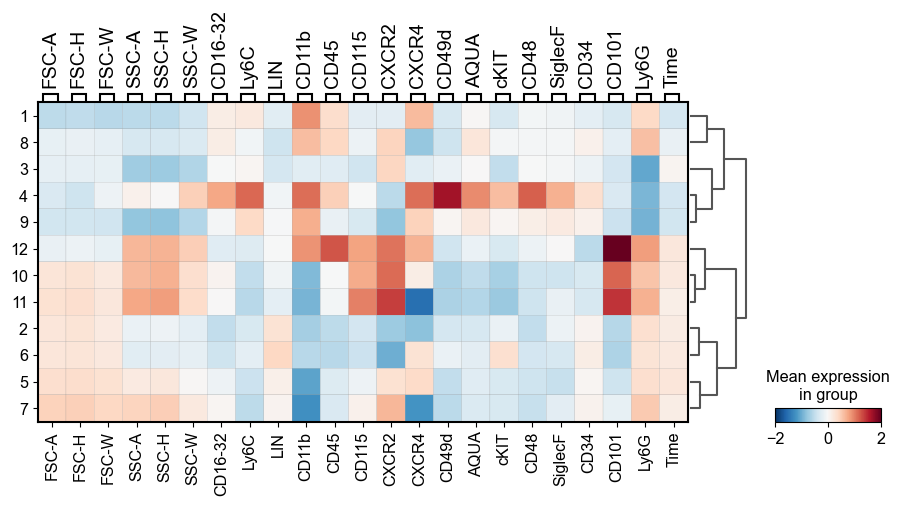

In [382]:
sc.pl.matrixplot(adata, marker,'Parc_cluster',
                 dendrogram=True,vmin=-2, vmax=2, cmap='RdBu_r',layer="scaled")

/Users/simone/opt/miniconda3/envs/dev/lib/python3.6/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _ = ax.pcolor(_color_df, **kwds)


{'mainplot_ax': <AxesSubplot:>,
 'group_extra_ax': <AxesSubplot:>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

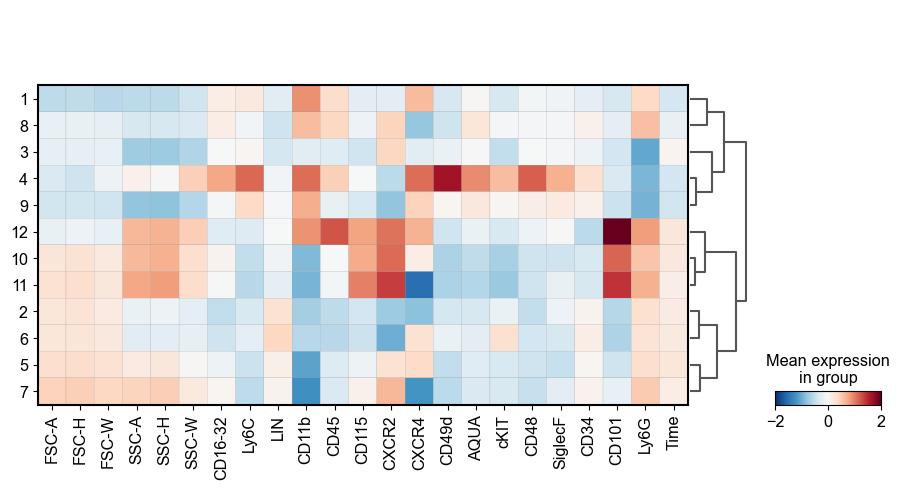

In [390]:
sc.pl.matrixplot(adata, list(adata.var_names),'Parc_cluster',
                                          dendrogram=True, vmin=-2, vmax=2, cmap='RdBu_r', layer="scaled",
                         show=False, swap_axes=False,return_fig=False)

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

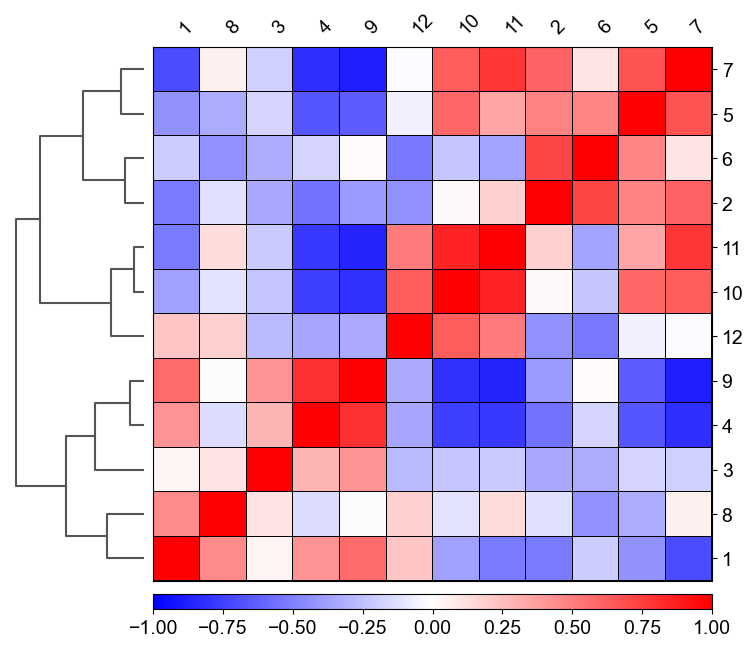

In [377]:
sc.pl.correlation_matrix(adata, 'Parc_cluster',show=False)

In [381]:
adata.var_names

Index(['FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'CD16-32', 'Ly6C',
       'LIN', 'CD11b', 'CD45', 'CD115', 'CXCR2', 'CXCR4', 'CD49d', 'AQUA',
       'cKIT', 'CD48', 'SiglecF', 'CD34', 'CD101', 'Ly6G', 'Time'],
      dtype='object')

In [375]:
?sc.pl.correlation_matrix

'Time.pdf'

'Time'

In [373]:
".".join([''.join(e for e in _ if e.isalnum()), "pdf"])

'Time.pdf'